# Mukbang Channels Data Analysis

Preprocessing, enriching and performing exploratory analysis on data on Mukbang channels using Youtube API

In [1]:
import pandas as pd
import numpy as np

from googleapiclient.discovery import build
from IPython.display import JSON

from functions import *

# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import isodate

# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [2]:
api_key = # FIXME: Enter your own api key

channel_ids = ['UCo9ZZ04kIhN_8xGxvnjaduQ', # Stephanie Soo
               'UCp4LfMtDfoa29kTlLnqQ5Mg', # SAS-ASMR
               'UCkS6mJ0i2oMdHEdR-Jpw9Ug', # Hyuneeeats
               'UCoaegtPODTjRaaQdEND2m4Q', # NE Let's Eat
               'UCI78AdiI6f7VKhqW1i4B3Rw', # Zach Choi
               'UCNopoBpPj8RUebuv5Ds5Cqw', # Veronica Wang
              ]


In [3]:
# Get credentials and create an API client
# api service name: "youtube"
# api version: "v3"
youtube = build("youtube", "v3", developerKey=api_key)

In [4]:
# get channelName, subscriber, views, totalVideos and playlistId of all channels
channel_data = get_channel_stats(youtube, channel_ids)
channel_data

,channelName,subscribers,views,totalVideos,playlistId
0,SAS-ASMR,9390000,2759082774,1694,UUp4LfMtDfoa29kTlLnqQ5Mg
1,Veronica Wang,1900000,358582096,234,UUNopoBpPj8RUebuv5Ds5Cqw
2,Stephanie Soo,2710000,598640158,981,UUo9ZZ04kIhN_8xGxvnjaduQ
3,N.E Let's Eat,3730000,1101281440,1316,UUoaegtPODTjRaaQdEND2m4Q
4,Zach Choi ASMR,14700000,2670905752,694,UUI78AdiI6f7VKhqW1i4B3Rw
5,hyuneeEats,1700000,287762241,501,UUkS6mJ0i2oMdHEdR-Jpw9Ug


In [5]:
# Convert count columns ('subscribers', 'views', 'totalVideos') to numeric columns in channel_data
numeric_cols = ['subscribers', 'views', 'totalVideos']
channel_data[numeric_cols] = channel_data[numeric_cols].apply(pd.to_numeric, errors='coerce')
channel_data.dtypes

channelName    object
subscribers     int64
views           int64
totalVideos     int64
playlistId     object
dtype: object

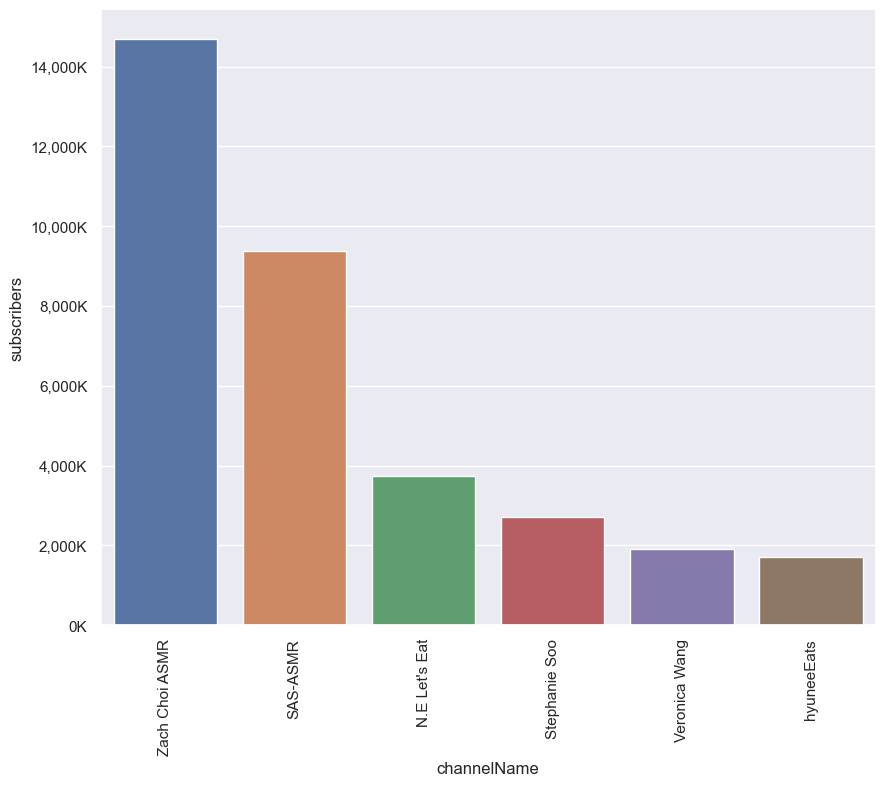

In [6]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='channelName', y='subscribers', data=channel_data.sort_values('subscribers', ascending=False))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

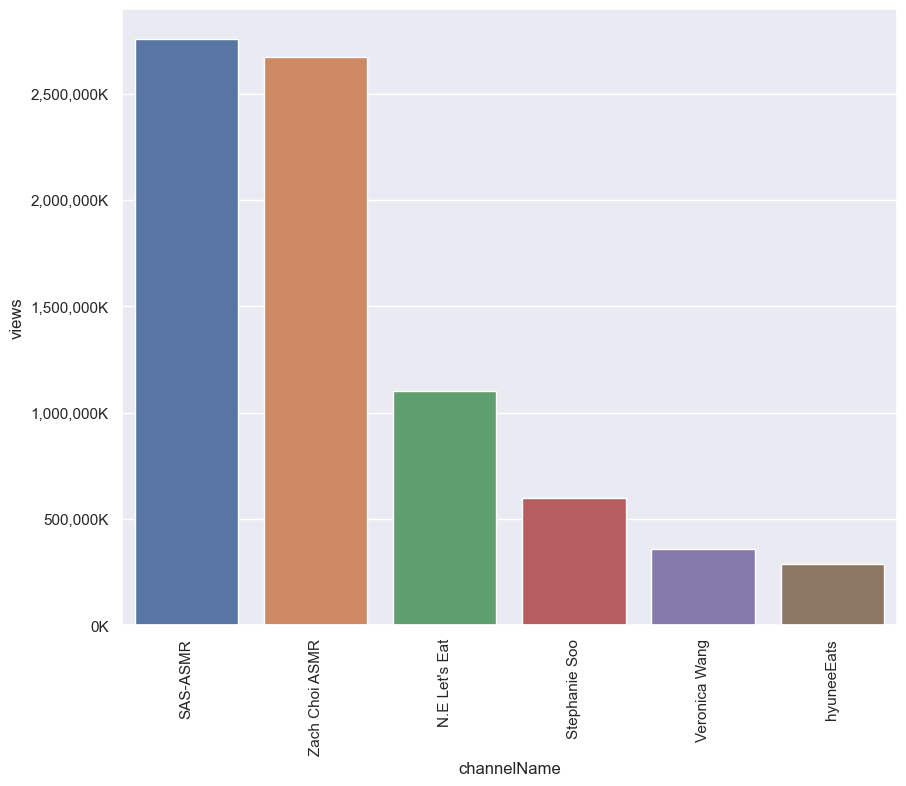

In [7]:
ax = sns.barplot(x='channelName', y='views', data=channel_data.sort_values('views', ascending=False))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [8]:
# Create a dataframe with video statistics and comments from all channels

video_df = pd.DataFrame()
comments_df = pd.DataFrame()

for i,c in enumerate(channel_data['channelName'].unique()):
    print("Getting video information from channel: " + c)
    playlist_id = channel_data['playlistId'][i]
    video_ids = get_video_ids(youtube, playlist_id)
    
    # get video data
    video_data = get_video_details(youtube, video_ids)

    # append video data together
    video_df = video_df.append(video_data, ignore_index=True)

Getting video information from channel: SAS-ASMR


/var/folders/s1/s_t_60lx7k9b3wnl42xmt64r0000gp/T/ipykernel_26774/2514083758.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)


Getting video information from channel: Veronica Wang


/var/folders/s1/s_t_60lx7k9b3wnl42xmt64r0000gp/T/ipykernel_26774/2514083758.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)


Getting video information from channel: Stephanie Soo


/var/folders/s1/s_t_60lx7k9b3wnl42xmt64r0000gp/T/ipykernel_26774/2514083758.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)


Getting video information from channel: N.E Let's Eat


/var/folders/s1/s_t_60lx7k9b3wnl42xmt64r0000gp/T/ipykernel_26774/2514083758.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)


Getting video information from channel: Zach Choi ASMR


/var/folders/s1/s_t_60lx7k9b3wnl42xmt64r0000gp/T/ipykernel_26774/2514083758.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)


Getting video information from channel: hyuneeEats


/var/folders/s1/s_t_60lx7k9b3wnl42xmt64r0000gp/T/ipykernel_26774/2514083758.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  video_df = video_df.append(video_data, ignore_index=True)


In [9]:
video_df.to_csv('video_data.csv')
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouritecount,commentCount,duration,definition,caption
0,swSV0-s7mIk,SAS-ASMR,ASMR SPICY FOOD PLATTER *SASHIMI + PAPAYA SALA...,ASMR SPICY FOOD PLATTER *SASHIMI + PAPAYA SALA...,"[SAS-ASMR, SASitTube, SAS-Squad, sasvlogs, sas...",2022-10-14T16:01:36Z,92889,4228,None,160,PT14M29S,hd,false
1,mzH8-UVSeZg,SAS-ASMR,Don't eat yellow ❄️❄️❄️... #throwback #shorts,,None,2022-10-14T16:01:09Z,14831,747,None,21,PT1M1S,hd,false
2,gK1dzHjPXU4,SAS-ASMR,THE CRUNCH!! #throwback #shorts,,None,2022-10-14T16:00:53Z,9745,521,None,5,PT1M1S,hd,false
3,orgiiTqyZOA,SAS-ASMR,ASMR FRIED CHICKEN ??? (EATING SOUNDS) NO TALK...,ASMR FRIED CHICKEN ??? (EATING SOUNDS) NO TALK...,"[SAS-ASMR, SASitTube, SAS-Squad, sasvlogs, sas...",2022-10-13T02:40:23Z,89546,3487,None,148,PT5M54S,hd,false
4,MhxtYYNhBco,SAS-ASMR,17 Million views 🤭 ... #throwback #shorts,,None,2022-10-13T02:32:25Z,23422,1299,None,19,PT1M1S,hd,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5418,6C62p6uxrpM,hyuneeEats,SPICY RICE CAKE CHALLENGE | MUKBANG,Spicy Rice Cake Mukbang!\nWatch me eat the spi...,"[Spicy, Rice Cake, Mukbang, hyuneeEats, 먹방, Sp...",2016-08-25T11:11:57Z,247759,4051,None,385,PT5M28S,hd,true
5419,UtkoNibMwVQ,hyuneeEats,BLACK BEAN NOODLES + SPICY SEAFOOD NOODLES | ...,"Black Bean Noodles, Spicy Seafood Noodles, and...","[Black bean noodles, Spicy Seafood Noodles, Sw...",2016-08-23T06:26:10Z,177897,2551,None,284,PT8M15S,hd,true
5420,eByoPn5oZ3Q,hyuneeEats,KOREAN FRIED CHICKEN | MUKBANG,Korean Fried Chicken Mukbang!\nWatch me eat Ko...,"[Korean, Fried Chicken, Mukbang, Food show, Ea...",2016-08-19T20:09:57Z,136649,2400,None,374,PT37M55S,hd,true
5421,47lXycHHq08,hyuneeEats,BURGER KING WHOPPER BURRITO | MUKBANG,Burger King Whopperito Mukbang!\nWatch me try ...,"[Burger King Whopperito, Review, Mukbang, 먹방, ...",2016-08-17T13:27:23Z,75479,1597,None,196,PT20M41S,hd,true


## Preprocessing
- Fix data types
- Sort by published date
- Add columns for future use

In [10]:
video_df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount          True
favouritecount     True
commentCount       True
duration          False
definition        False
caption           False
dtype: bool

In [11]:
video_df.publishedAt.sort_values().value_counts()

2022-09-03T01:30:06Z    2
2019-07-18T17:00:01Z    2
2022-09-09T01:30:00Z    2
2019-06-05T02:00:02Z    2
2022-07-20T01:30:05Z    2
                       ..
2019-02-28T00:27:15Z    1
2019-02-28T00:27:12Z    1
2019-02-27T21:45:50Z    1
2019-02-27T01:41:25Z    1
2022-10-15T01:30:11Z    1
Name: publishedAt, Length: 5418, dtype: int64

In [12]:
video_df.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouritecount    object
commentCount      object
duration          object
definition        object
caption           object
dtype: object

In [13]:
# change numeric data from object type to numeric type
numeric_cols = ['viewCount', 'likeCount', 'favouritecount', 'commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [14]:
# convert youtube duration to float
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

In [15]:
video_df.dtypes

video_id           object
channelTitle       object
title              object
description        object
tags               object
publishedAt        object
viewCount         float64
likeCount         float64
favouritecount    float64
commentCount      float64
duration           object
definition         object
caption            object
durationSecs      float64
dtype: object

### Enriching
#### Adding columns for future use

In [16]:
# Add publish day in the week
video_df['publishedAt'] = pd.to_datetime(video_df['publishedAt'])
video_df['publishedDayName'] = video_df['publishedAt'].dt.day_name()

In [17]:
# Add number of tags
video_df['tagCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [18]:
# Add title character length
video_df['titleLength'] = video_df['title'].apply(lambda x: len(x))

In [19]:
# Comments and likes per 1000 view ratio
video_df['likeRatio'] = video_df['likeCount']/ video_df['viewCount'] * 1000
video_df['commentRatio'] = video_df['commentCount']/ video_df['viewCount'] * 1000

In [20]:
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouritecount,commentCount,duration,definition,caption,durationSecs,publishedDayName,tagCount,titleLength,likeRatio,commentRatio
0,swSV0-s7mIk,SAS-ASMR,ASMR SPICY FOOD PLATTER *SASHIMI + PAPAYA SALA...,ASMR SPICY FOOD PLATTER *SASHIMI + PAPAYA SALA...,"[SAS-ASMR, SASitTube, SAS-Squad, sasvlogs, sas...",2022-10-14 16:01:36+00:00,92889.0,4228.0,NaN,160.0,PT14M29S,hd,false,869.0,Friday,36,99,45.516692,1.722486
1,mzH8-UVSeZg,SAS-ASMR,Don't eat yellow ❄️❄️❄️... #throwback #shorts,,None,2022-10-14 16:01:09+00:00,14831.0,747.0,NaN,21.0,PT1M1S,hd,false,61.0,Friday,0,45,50.367474,1.415953
2,gK1dzHjPXU4,SAS-ASMR,THE CRUNCH!! #throwback #shorts,,None,2022-10-14 16:00:53+00:00,9745.0,521.0,NaN,5.0,PT1M1S,hd,false,61.0,Friday,0,31,53.463315,0.513084
3,orgiiTqyZOA,SAS-ASMR,ASMR FRIED CHICKEN ??? (EATING SOUNDS) NO TALK...,ASMR FRIED CHICKEN ??? (EATING SOUNDS) NO TALK...,"[SAS-ASMR, SASitTube, SAS-Squad, sasvlogs, sas...",2022-10-13 02:40:23+00:00,89546.0,3487.0,NaN,148.0,PT5M54S,hd,false,354.0,Thursday,35,60,38.940880,1.652782
4,MhxtYYNhBco,SAS-ASMR,17 Million views 🤭 ... #throwback #shorts,,None,2022-10-13 02:32:25+00:00,23422.0,1299.0,NaN,19.0,PT1M1S,hd,false,61.0,Thursday,0,41,55.460678,0.811203


# Data Analysis Section
Using seaborn and matplotlib

### Best Performing Videos

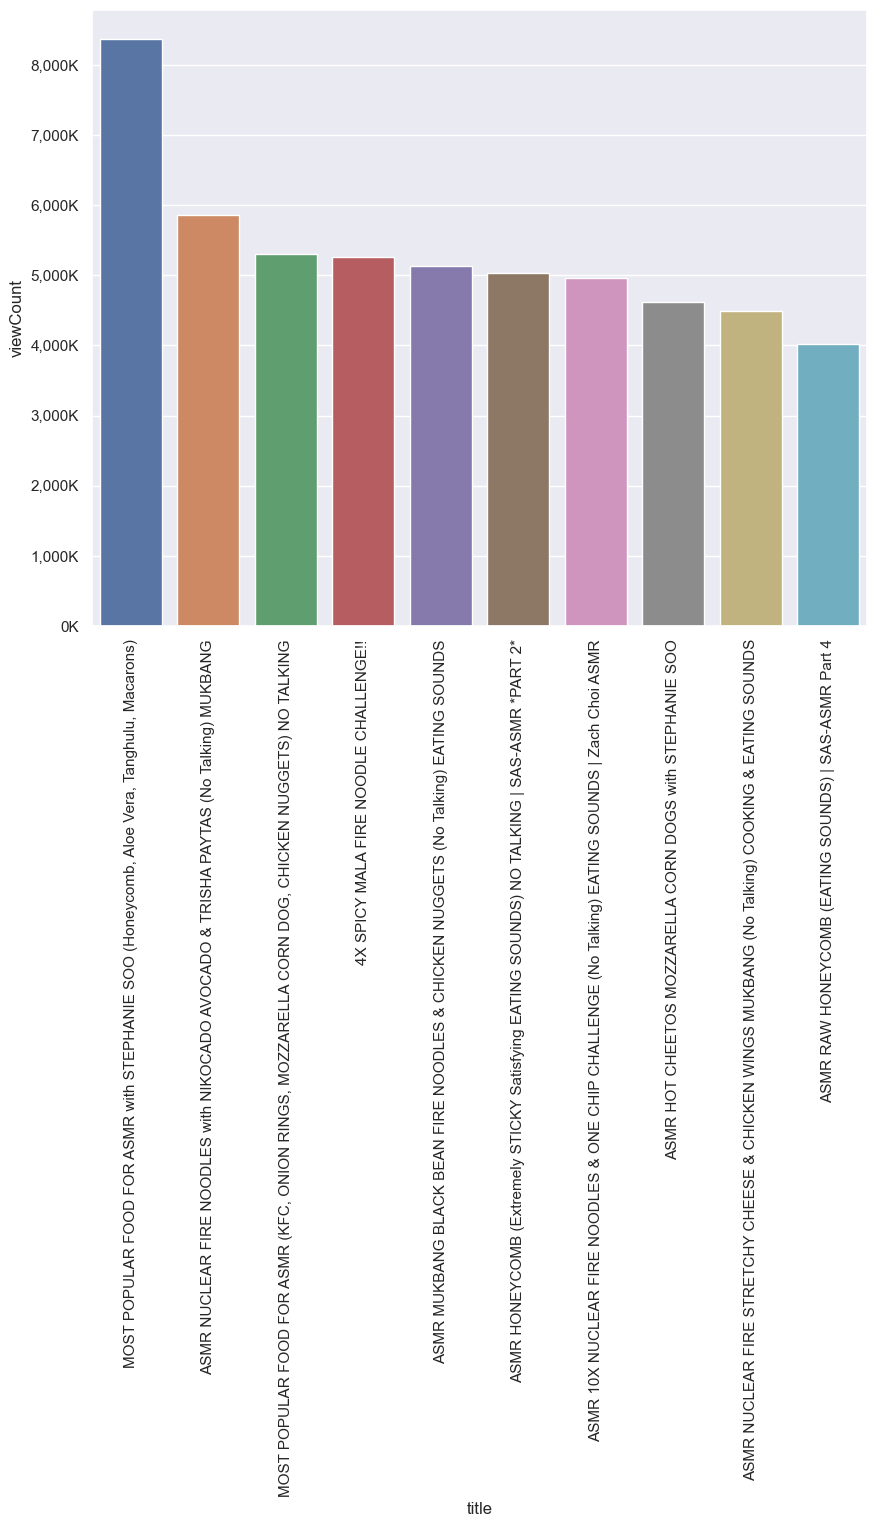

In [21]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=False)[0:10])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/10000) + 'K'))

### Worst Performing Videos

/Users/shansita-dev/opt/anaconda3/envs/python3-8/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shansita-dev/opt/anaconda3/envs/python3-8/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shansita-dev/opt/anaconda3/envs/python3-8/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10052 (\N{SNOWFLAKE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


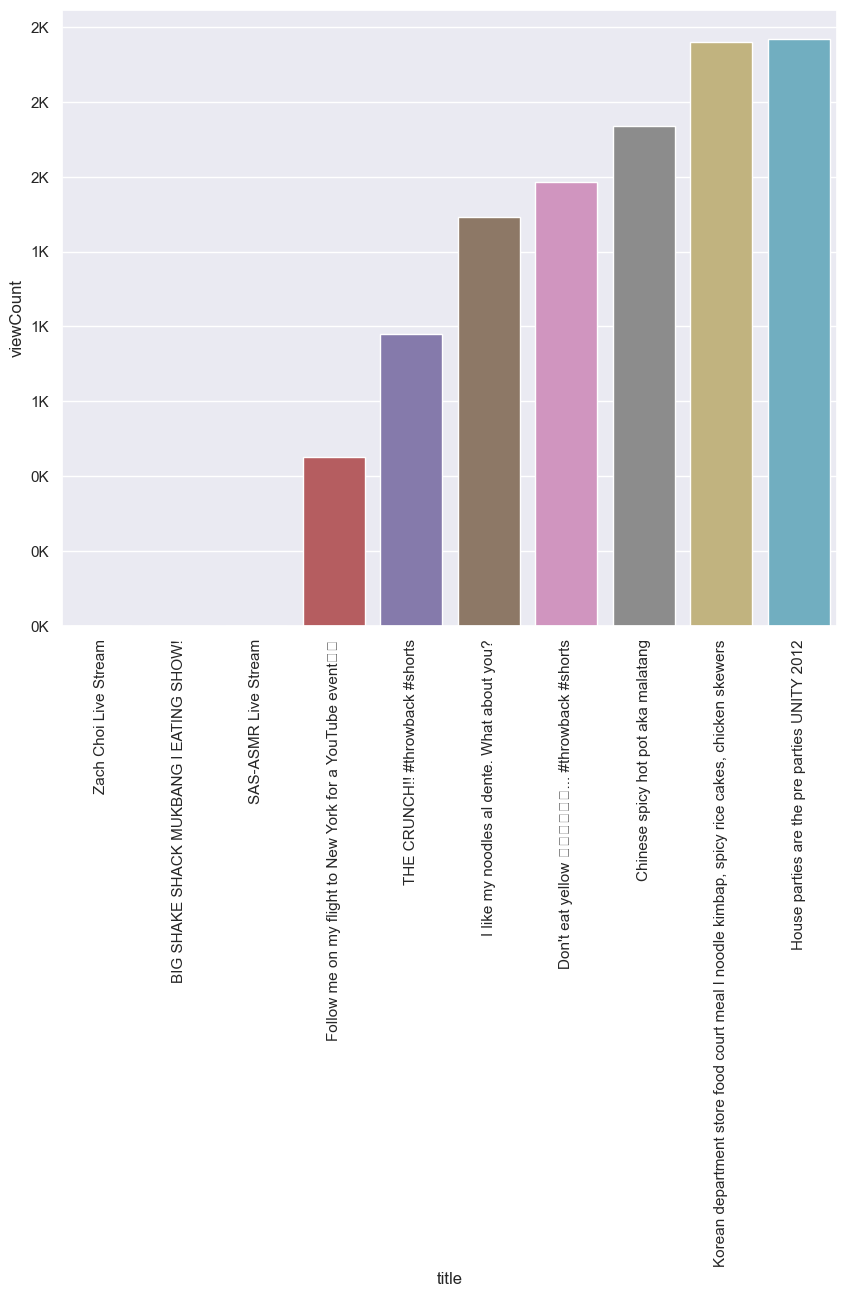

In [22]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=True)[0:10])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/10000) + 'K'))

### How are views distributed for each channel?

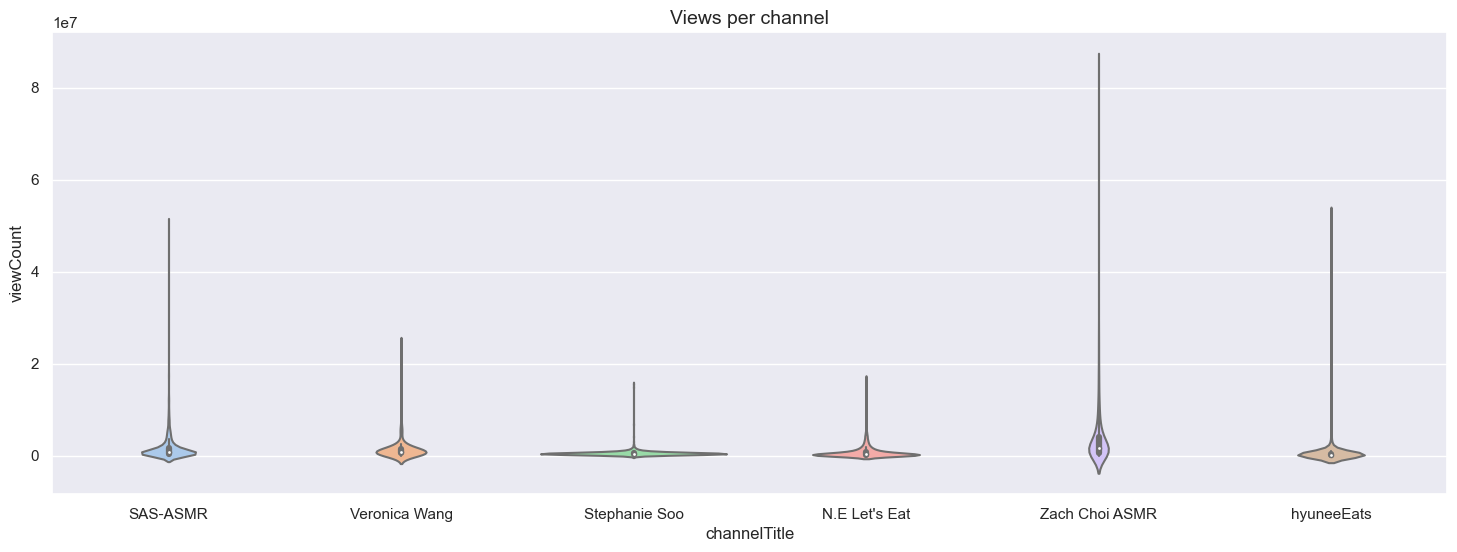

In [23]:
plt.rcParams['figure.figsize'] = (18, 6)
sns.violinplot(x = video_df['channelTitle'], y = video_df['viewCount'], palette = 'pastel');
plt.title('Views per channel', fontsize = 14)
plt.show()

### Is the number of likes and comments correlated for with views?

Correlation coefficient between likes and views = 
           likeCount  viewCount
likeCount   1.000000   0.872264
viewCount   0.872264   1.000000

Correlation coefficient between comments and views = 
              commentCount  viewCount
commentCount      1.000000   0.868384
viewCount         0.868384   1.000000


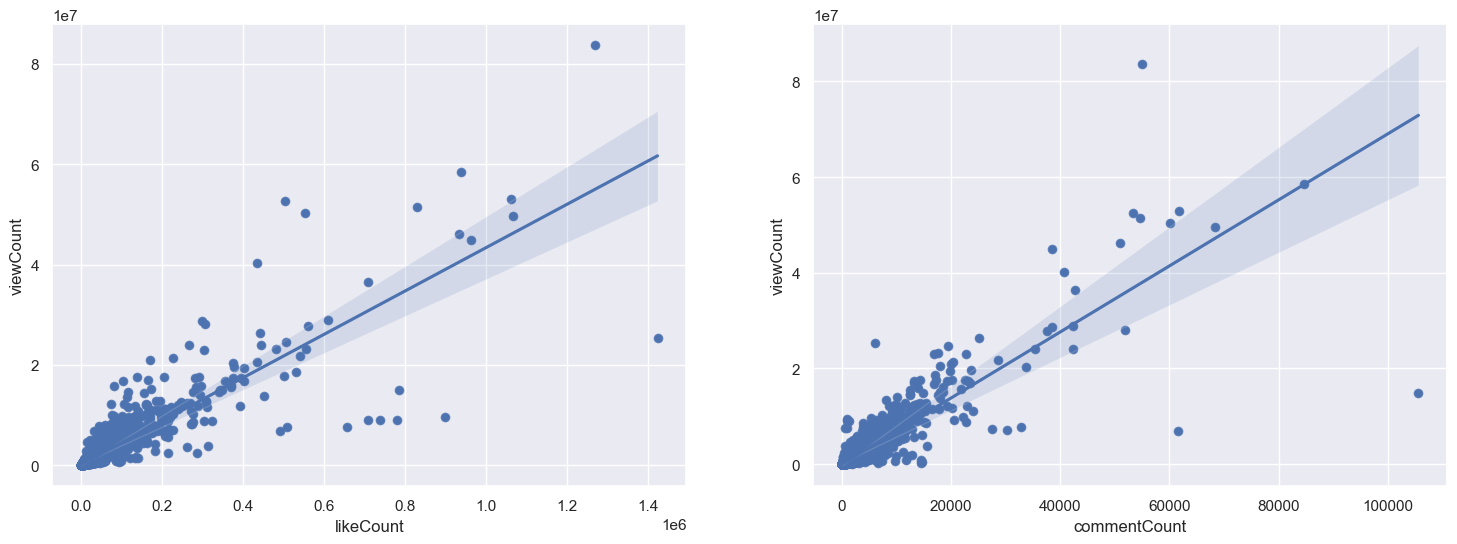

In [24]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = video_df, x = 'likeCount', y = 'viewCount', ax = ax[0]);
sns.regplot(x = 'likeCount', y = 'viewCount', data=video_df, ax=ax[0]);

sns.scatterplot(data = video_df, x = 'commentCount', y = 'viewCount', ax = ax[1]);
sns.regplot(x = 'commentCount', y = 'viewCount', data=video_df, ax=ax[1]);

rho_like_view = video_df[['likeCount','viewCount']].corr(method='pearson')
rho_comment_view = video_df[['commentCount','viewCount']].corr(method='pearson')

print(f'Correlation coefficient between likes and views = \n{rho_like_view}')
print(f'\nCorrelation coefficient between comments and views = \n{rho_comment_view}')

Correlation coefficient between likes per 100 views and views = 
           likeCount  viewCount
likeCount   1.000000   0.872264
viewCount   0.872264   1.000000

Correlation coefficient between comments per 100 views and views = 
              commentCount  viewCount
commentCount      1.000000   0.868384
viewCount         0.868384   1.000000


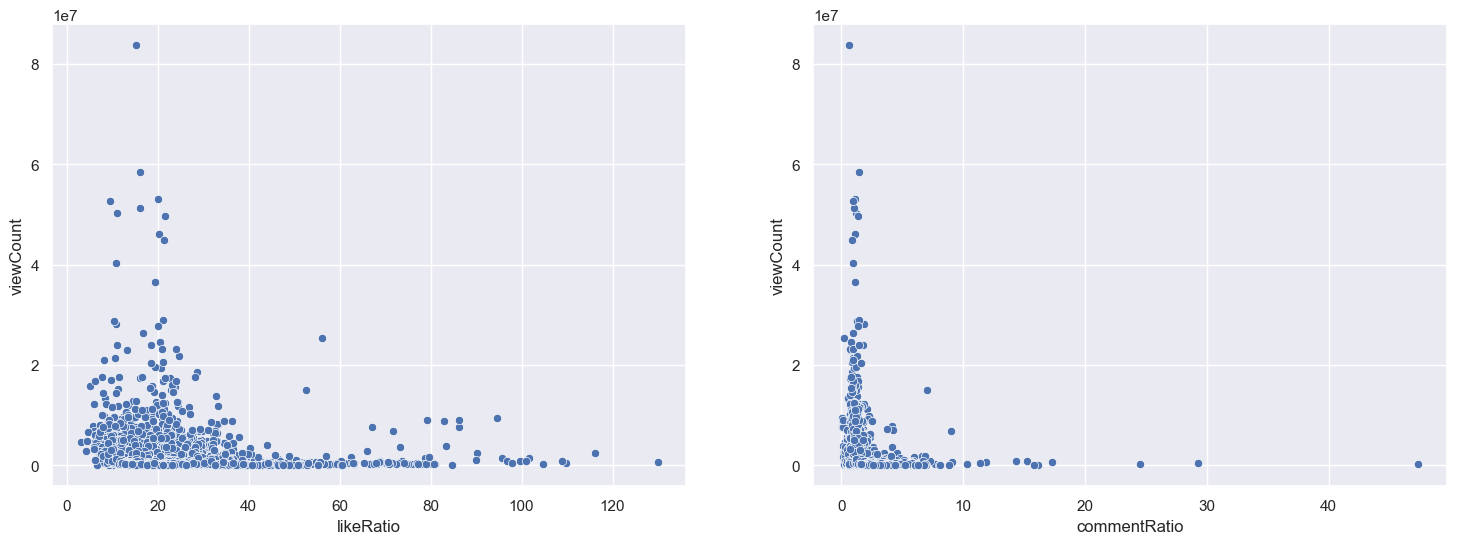

In [25]:
# Correlation for comment ratio and like ratio against views.

fig, ax =plt.subplots(1,2)
sns.scatterplot(data = video_df, x = "likeRatio", y = "viewCount", ax=ax[0]);
sns.scatterplot(data = video_df, x = "commentRatio", y = "viewCount", ax=ax[1]);

rho_likeRatio_view = video_df[['likeCount','viewCount']].corr(method='pearson')
rho_commentRation_view = video_df[['commentRatio','viewCount']].corr(method='pearson')

print(f'Correlation coefficient between likes per 100 views and views = \n{rho_like_view}')
print(f'\nCorrelation coefficient between comments per 100 views and views = \n{rho_comment_view}')

### Wordcloud for words in title

In [26]:
# stop_words contains common english words
stop_words = set(stopwords.words('english'))
# add channel names to stop_words
channel_words = []
for name in channel_data['channelName']:
    for word in name.split():
        channel_words.append(word)

video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

channel_words

['SAS-ASMR',
 'Veronica',
 'Wang',
 'Stephanie',
 'Soo',
 'N.E',
 "Let's",
 'Eat',
 'Zach',
 'Choi',
 'ASMR',
 'hyuneeEats']

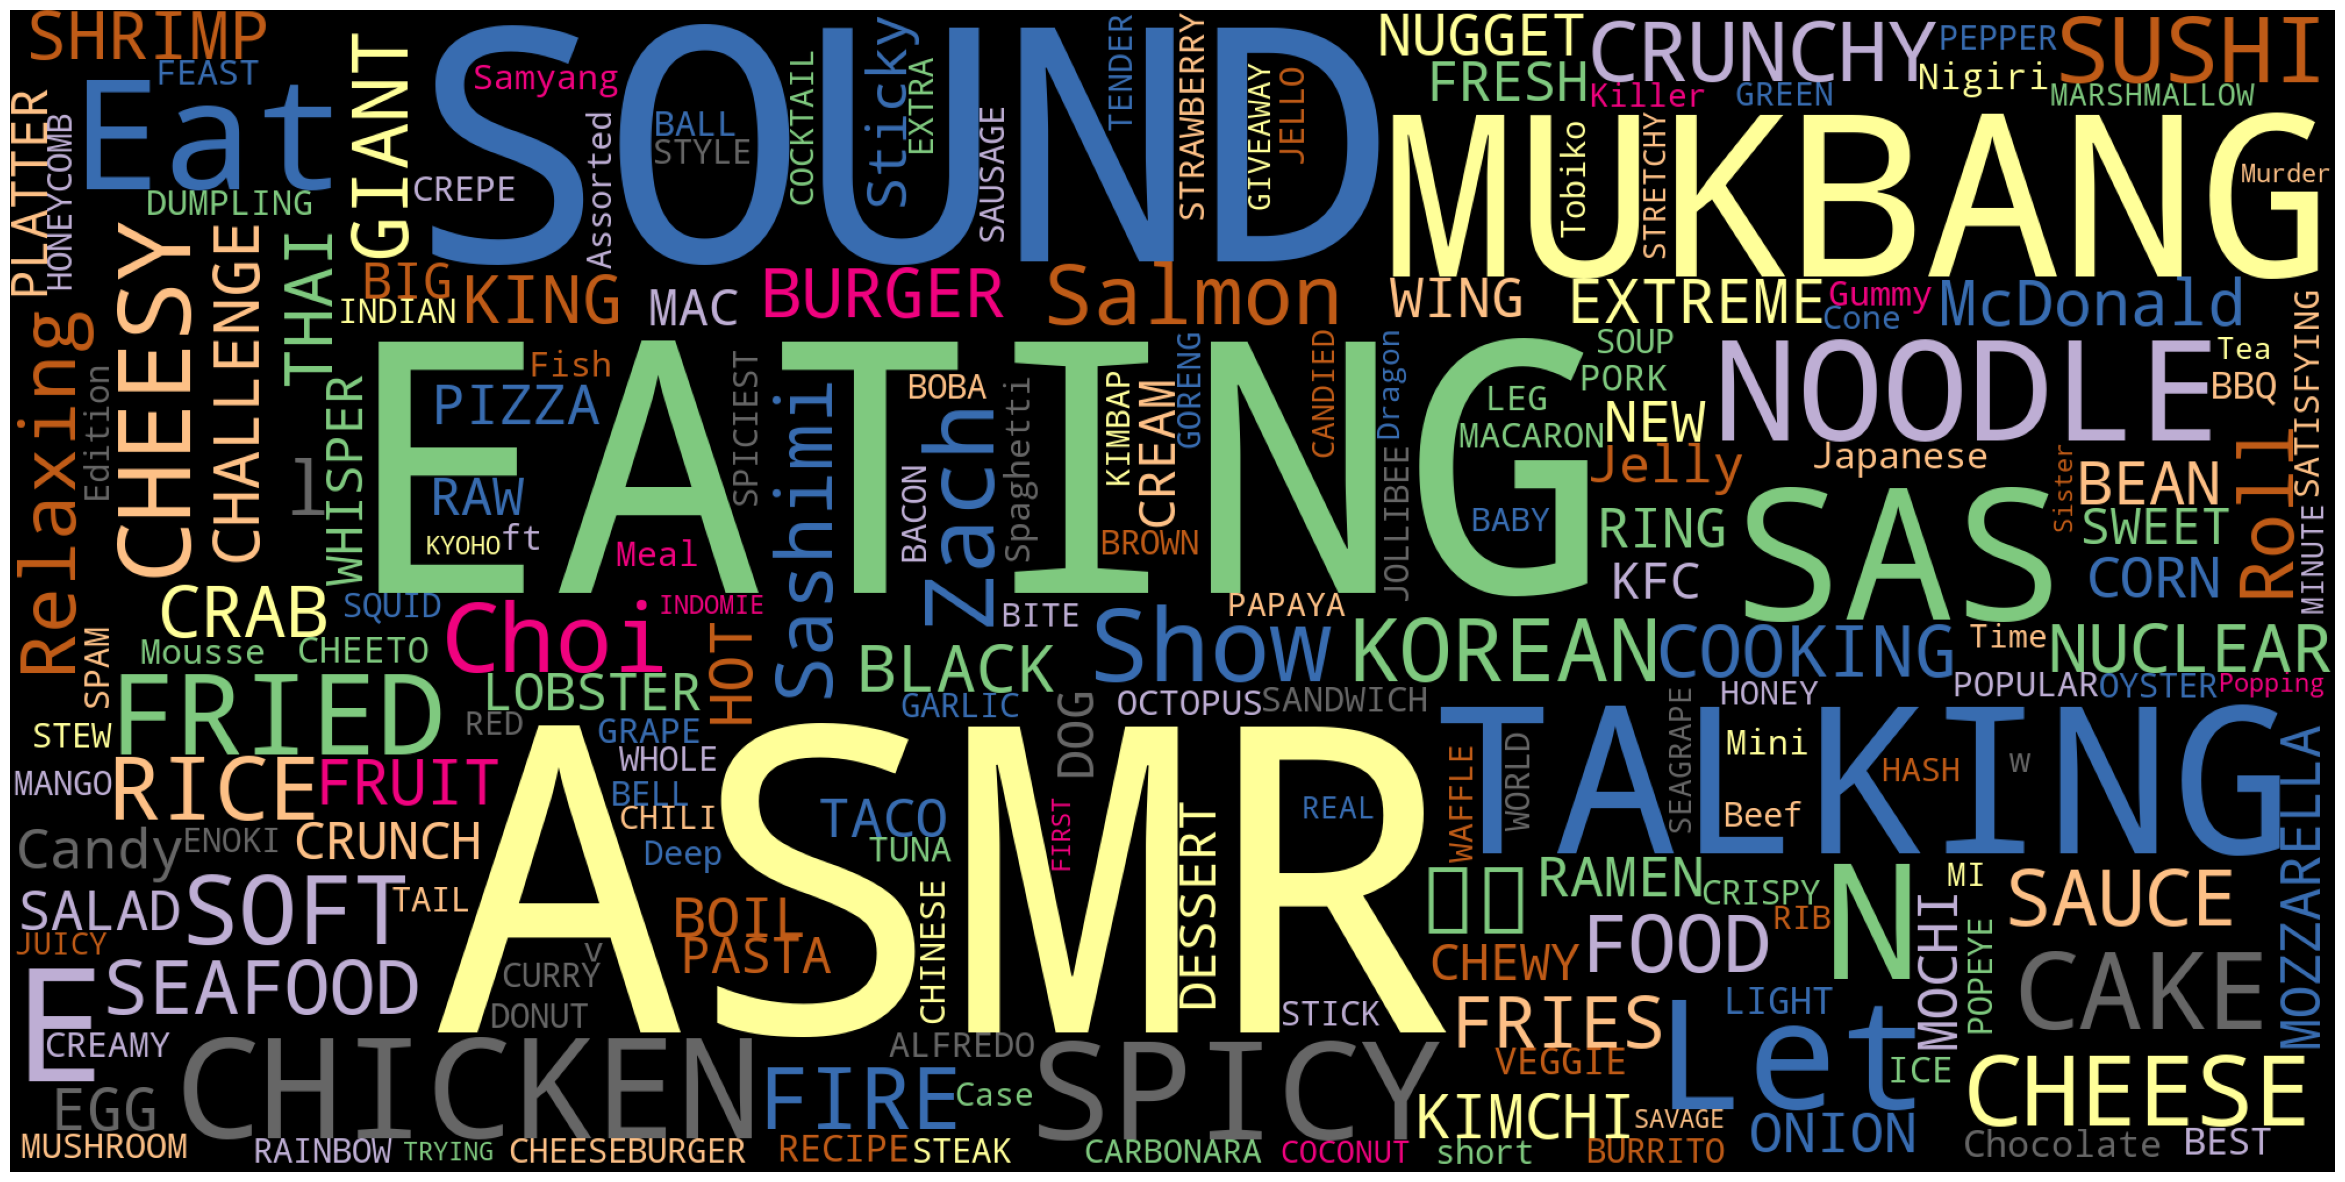

In [27]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='Accent', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)